Based on the course _Elements of Data Science_ from the [AWS Certified Machine Learning](https://aws.amazon.com/training/learning-paths/machine-learning/) program and [The Interactive Data Science Tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial), this notebook summarizes the ML workflow and provides a template as a starting guide to a new project.

Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
from viz import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset loading

As toy example we will use the famous Titanic dataset from Kaggle.

For a description on the meaning of the columns go to https://www.kaggle.com/c/titanic/data

In [2]:
train_df = pd.read_csv('./data/titanic/train.csv')
test_df = pd.read_csv('./data/titanic/test.csv')

full = train_df.append(test_df, ignore_index = True)
titanic = train_df

# Exploratory Data Analysis

To understand relationships in data.

## First look

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data issues

Some potential issues in the dataset could be:

* Messy data
* Different scales
* Mixed types
* Imbalanced data
* Sample bias
* Outliers
* Highly correlated features

Imbalanced data?

In [4]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Any nulls?

In [5]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Data statistics

Dimensions

In [6]:
# Number of instances x attributes
titanic.shape

(891, 12)

Histograms and plots will let us understand the behavior of the feature.

### Univariate statistics

#### Numeric attributes

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


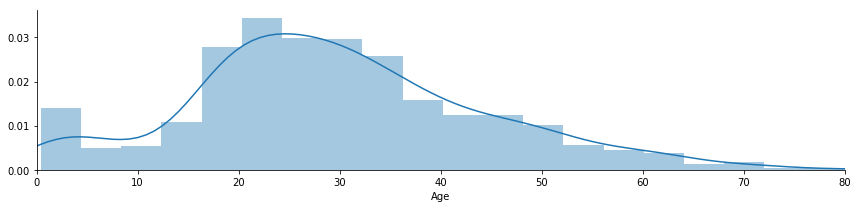

In [3]:
plot_histogram(titanic, var='Age')

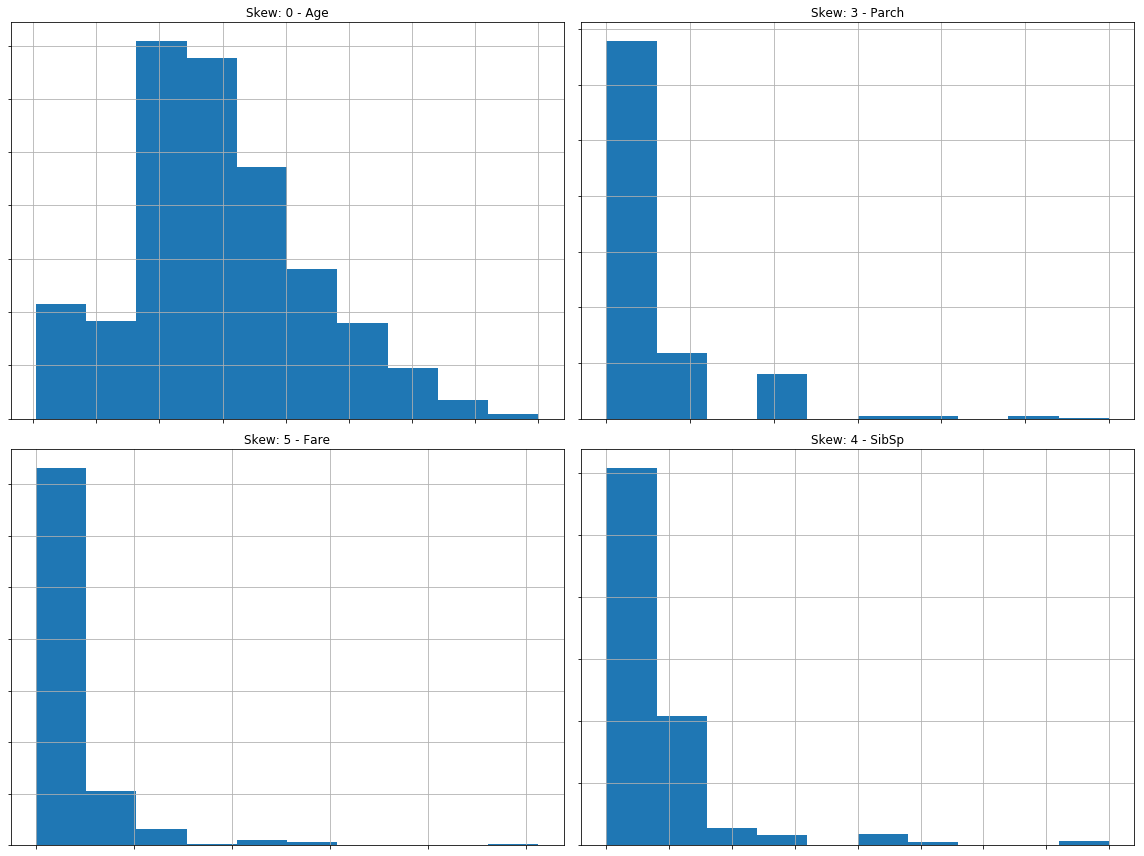

In [5]:
plot_histograms(titanic, variables=['Age', 'Parch', 'Fare', 'SibSp'], n_rows=2, n_cols=2)

#### Categorical attributes

In [11]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Multivariate statistics

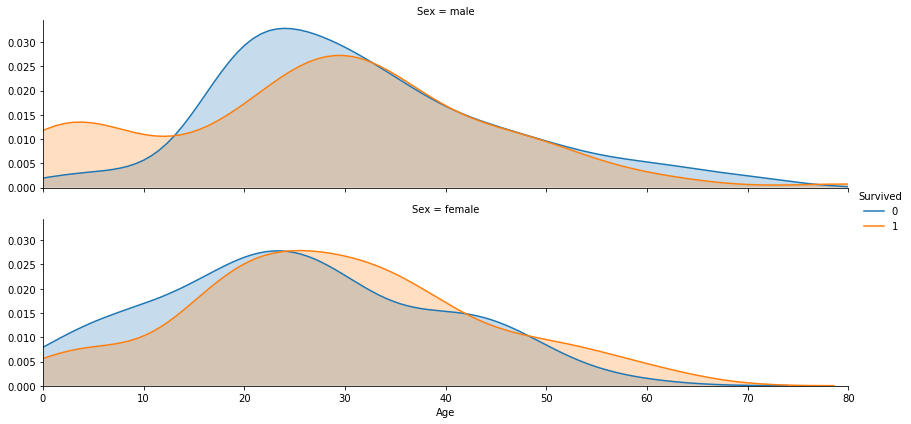

In [6]:
plot_distribution(titanic, var='Age', target='Survived', row='Sex')

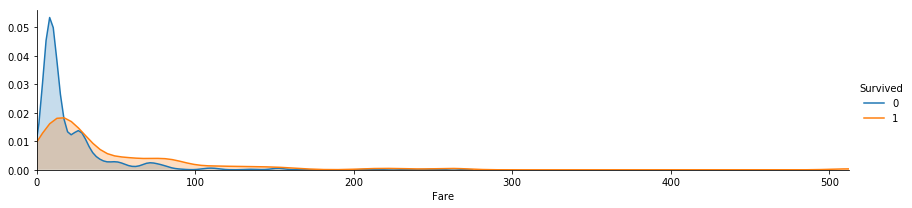

In [7]:
plot_distribution(titanic, var='Fare', target='Survived')

/home/ro/anaconda2/envs/deep/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


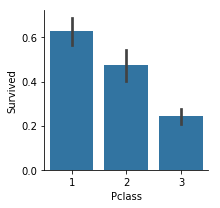

In [8]:
plot_categories(titanic, cat='Pclass', target='Survived')

/home/ro/anaconda2/envs/deep/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


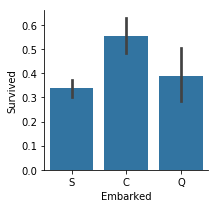

In [9]:
plot_categories(titanic, cat='Embarked', target='Survived')

Fare for group S (median) 13.0
Fare for group C (median) 29.7
Fare for group Q (median) 7.75


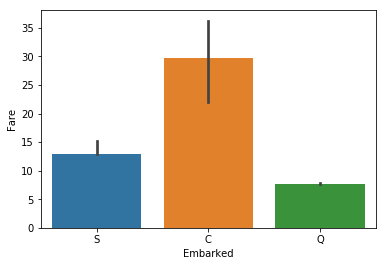

In [10]:
sns.barplot(x="Embarked", y="Fare", data=titanic, estimator=np.median)
print('Fare for group S (median)', titanic[titanic['Embarked'] == 'S']['Fare'].median())
print('Fare for group C (median)', titanic[titanic['Embarked'] == 'C']['Fare'].median())
print('Fare for group Q (median)', titanic[titanic['Embarked'] == 'Q']['Fare'].median())

#### Scatterplot matrix

Is an efficient way of spotting strong correlations between variables

/home/ro/anaconda2/envs/deep/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ro/anaconda2/envs/deep/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ro/anaconda2/envs/deep/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/ro/anaconda2/envs/deep/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


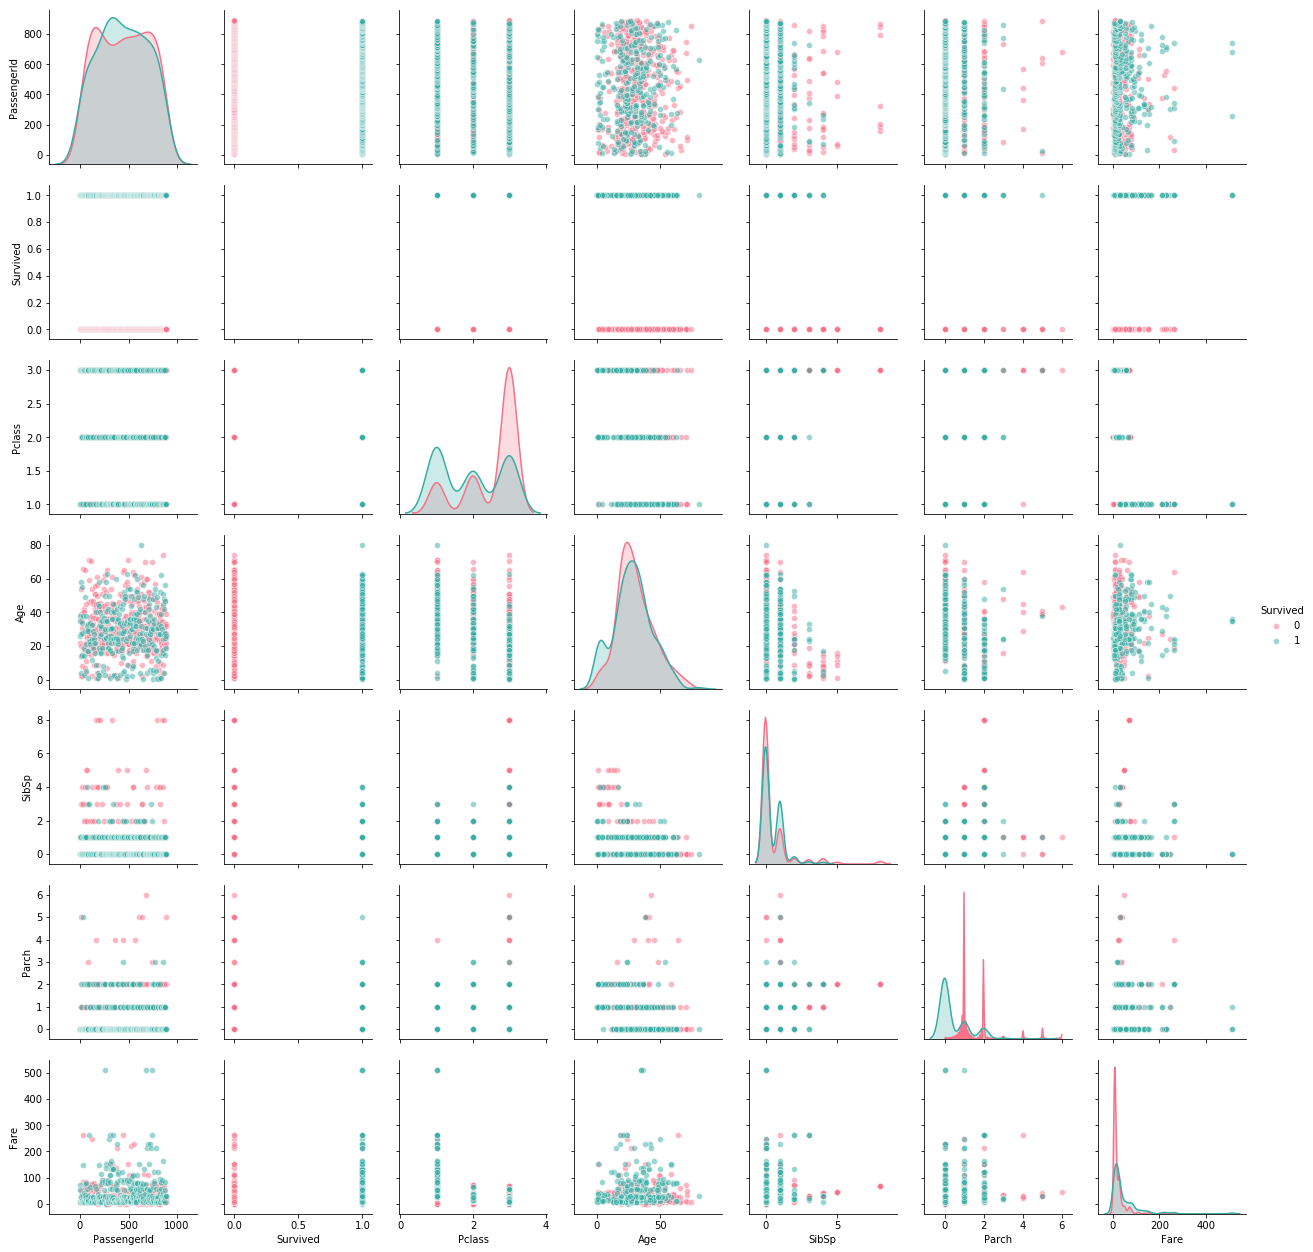

In [12]:
# Will not work if a column has null values
sns.pairplot(titanic, hue="Survived", palette="husl", plot_kws={'alpha': 0.5})

## Correlations


Pearson Correlation

\begin{equation}
{\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}
\end{equation}

Variance

\begin{equation}
{\displaystyle \sigma _{X}^{2}={\frac {1}{n}}\sum _{i=1}^{n}\left(X_{i}-{\overline {X}}\right)^{2}}
\end{equation}

Covariance between (x, y)

\begin{equation}
{\displaystyle \operatorname {cov} (X,Y)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-E(X))(y_{i}-E(Y)).}
\end{equation}

Correlation between (x, y)

\begin{equation}
{\displaystyle \rho _{X,Y}=\operatorname {corr} (X,Y)={\operatorname {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}}}
\end{equation}

A _correlation matrix_ measures the linear dependence between features.


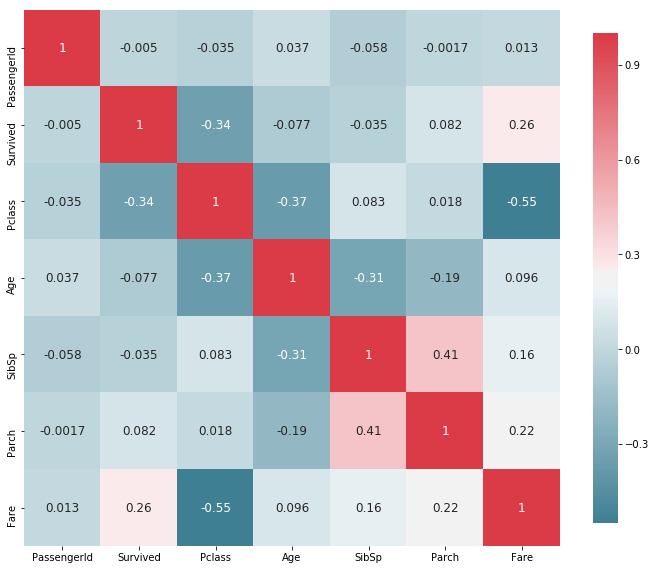

In [18]:
plot_correlation_map(titanic)

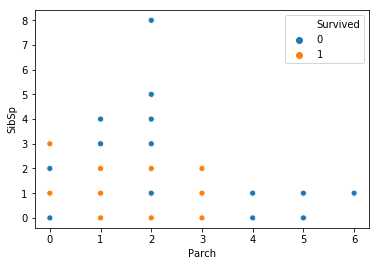

In [19]:
sns.scatterplot(x="Parch", y="SibSp", hue="Survived", data=titanic)